# Geely Auto Car Price Prediction Model


#### This notebook is built for <font color = blue>Geely Auto (Chinese automobile company)</font> who wants to predict their car prices in US market for setting up their new manufcturing unit, which will compete with the existing US and European car players. 

#### This notebook contains following sections which organizes our analysis and inferences for easy consumption driving <u>data-driven  decision making</u> for Geely Auto Management.

1. Section 1: Exploratortory Data Analysis
2. Section 2: Data Preparation for ML Model
3. Section 3: Model Building
4. Section 4: Residual Analysis
5. Section 5: Prediction and Model Evaluation

***
>- `Created by: Chandrashekhar V Purandare`
>- `Creation Date: 15-Jan-2010`
>- `Modified by:Chandrashekhar V Purandare`
>- `Last Modified Date: 19-Jan-2020`
>- `Comments: Initial notebook creation and validation`
***

#### Pre-Req 1: Load required libraries 

In [725]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#import the required libraries for data manupulation
import numpy as np
import pandas as pd

#import the required libraries for data visulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import the required libraries for ML modelling and model verification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Pre-Req 2: Set Pandas display options and format

In [726]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:.5f}'.format

## Section 1: Exploratortory Data Analysis

### Step 1: Reading and Understanding the Car Data

##### <u>Important Assumption</u>: The CSV file containing the car price data is located in the same folder in which this Jupyter notebook is present.

Data Source: https://archive.ics.uci.edu/ml/datasets/Automobile

#### 1.1 Load the car price data

In [727]:
df_cars = pd.read_csv('CarPrice_Assignment.csv')
# Verify the data is loaded properly in dataframe
df_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,13495.00000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,16500.00000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50000,171.20000,65.50000,52.40000,2823,ohcv,six,152,mpfi,2.68000,3.47000,9.00000,154,5000,19,26,16500.00000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80000,176.60000,66.20000,54.30000,2337,ohc,four,109,mpfi,3.19000,3.40000,10.00000,102,5500,24,30,13950.00000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40000,176.60000,66.40000,54.30000,2824,ohc,five,136,mpfi,3.19000,3.40000,8.00000,115,5500,18,22,17450.00000


#### 1.2 Check the strcture of the data (Normal routine checks)

In [728]:
# Check the total number of rows and columns present in data set
print("Car price data set contains {0} colmuns and {1} rows.".format(df_cars.shape[1], df_cars.shape[0]))

Car price data set contains 26 colmuns and 205 rows.


In [729]:
# Get the descriptive statistics for car price data set
df_cars.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.00000,103.00000,59.32256,1.00000,52.00000,103.00000,154.00000,205.00000
symboling,205.00000,0.83415,1.24531,-2.00000,0.00000,1.00000,2.00000,3.00000
wheelbase,205.00000,98.75659,6.02178,86.60000,94.50000,97.00000,102.40000,120.90000
carlength,205.00000,174.04927,12.33729,141.10000,166.30000,173.20000,183.10000,208.10000
carwidth,205.00000,65.90780,2.14520,60.30000,64.10000,65.50000,66.90000,72.30000
carheight,205.00000,53.72488,2.44352,47.80000,52.00000,54.10000,55.50000,59.80000
curbweight,205.00000,2555.56585,520.68020,1488.00000,2145.00000,2414.00000,2935.00000,4066.00000
enginesize,205.00000,126.90732,41.64269,61.00000,97.00000,120.00000,141.00000,326.00000
boreratio,205.00000,3.32976,0.27084,2.54000,3.15000,3.31000,3.58000,3.94000
stroke,205.00000,3.25541,0.31360,2.07000,3.11000,3.29000,3.41000,4.17000


In [730]:
# Get the info about data set
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### <u>Analysis Summary</u>: It is clear from the above normal routine checks that there are <u>no missing values</u> in the data which needs to be treated. 


### Step 2 : Data Cleaning and Preparation

#### 2.1 Extract the Company Name

In [731]:
# Split the company name from CarName column on the basis of space char
company_name = df_cars['CarName'].apply(lambda x : x.split(' ')[0])
df_cars.insert(3,"companyname",company_name)

# Drop car name column, which we don't need for any further analysis 
df_cars.drop(['CarName'], axis=1, inplace=True)

df_cars.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,13495.00000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,16500.00000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.50000,171.20000,65.50000,52.40000,2823,ohcv,six,152,mpfi,2.68000,3.47000,9.00000,154,5000,19,26,16500.00000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.80000,176.60000,66.20000,54.30000,2337,ohc,four,109,mpfi,3.19000,3.40000,10.00000,102,5500,24,30,13950.00000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.40000,176.60000,66.40000,54.30000,2824,ohc,five,136,mpfi,3.19000,3.40000,8.00000,115,5500,18,22,17450.00000


#### 2.2 Rectify invalid Company Names (typo corrections)

In [732]:
# Get the unique car names
df_cars.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Analysis of incorrect company names
- There are some incorrect values in derived CompanyName column which might casued due to spelling mistakes in data input.

    - `alfa-romero` needs to be replaced with `alfa-romeo`
    - `maxda` needs to be replaced with `mazda`
    - `Nissan` needs to be replaced with `nissan` to have consistent case style with other company names.
    - `porcshce` needs to be replaced with `porsche`
    - `toyouta` needs to be replaced with `toyota`
    - `vokswagen` and `vw` needs to be replaced with `volkswagen`

In [733]:
df_cars.companyname.replace('alfa-romero', 'alfa-romeo', inplace=True)
df_cars.companyname.replace('maxda', 'mazda', inplace=True)
df_cars.companyname.replace('Nissan', 'nissan', inplace=True)
df_cars.companyname.replace('porcshce', 'porsche', inplace=True)
df_cars.companyname.replace('toyouta', 'toyota', inplace=True)
df_cars.companyname.replace('vokswagen', 'volkswagen', inplace=True)
df_cars.companyname.replace('vw', 'volkswagen', inplace=True)

Lets re-verify the unique company names now post correction

In [734]:
df_cars.companyname.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)


#### 2.3 Duplicate data analysis

In [735]:
# Verify if any duplicate rows exists for all columns
df_cars.loc[df_cars.duplicated()]

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


#### <u>Analysis Summary</u>: It can be noticed from the above output of duplicate check that there are <u>no duplicate rows</u> in the data which needs to be corrected. 

### Step 3: Visualizing the data


#### Step 3.1 : Visualising Class (Dependent) Variable i.e. "Price"

Analyse the spread of the class variable "Price" using Box plot

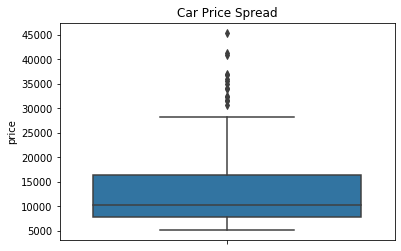

In [736]:
plt.title('Car Price Spread')
sns.boxplot(y=df_cars.price)

Analyse the car prices distribution using Histogram

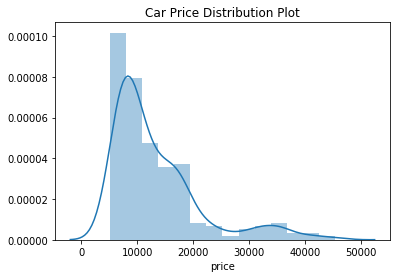

In [737]:
plt.title('Car Price Distribution Plot')
sns.distplot(df_cars.price)

Print the quartile ranges with further granular split between upper qurtile and max price (75% to 100%)

In [738]:
print(df_cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,1]))

count   205.00000  
mean    13276.71057
std     7988.85233 
min     5118.00000 
25%     7788.00000 
50%     10295.00000
75%     16503.00000
85%     18500.00000
90%     22563.00000
95%     32472.40000
100%    45400.00000
max     45400.00000
Name: price, dtype: float64


#### <u>Analysis Summary</u>:

1. The mean value (from above quartile table) for Price is 13276 whereas median value (from box plot) is ~10000. There clearly shows that thre is significant difference between the mean and the median values of the price distribution.
3. Looking at Box plot and Quartile table, it is clear that data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)
3. The distribution plot for "Price" is right-skewed, meaning that the most car model prices in the dataset are Below 16,500 (which 75% pecentile).

#### Step 3.2 : Categorical Data

Lets first find out all the categorial variables in data set using below code.

In [739]:
categorical_cols = df_cars.columns[df_cars.dtypes==object].tolist()

Also, consider symboling column as it contains only values from -3 (pretty safe) to +3 (risky) as per data dictionary.

In [740]:
categorical_cols.append('symboling')
print('List of Categorial Variables')
categorical_cols

List of Categorial Variables


['companyname',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'symboling']

Analyse how each of the categorial variable impacting price using Box plot

> I have analysed the company name indiviually which has coparatively more values.

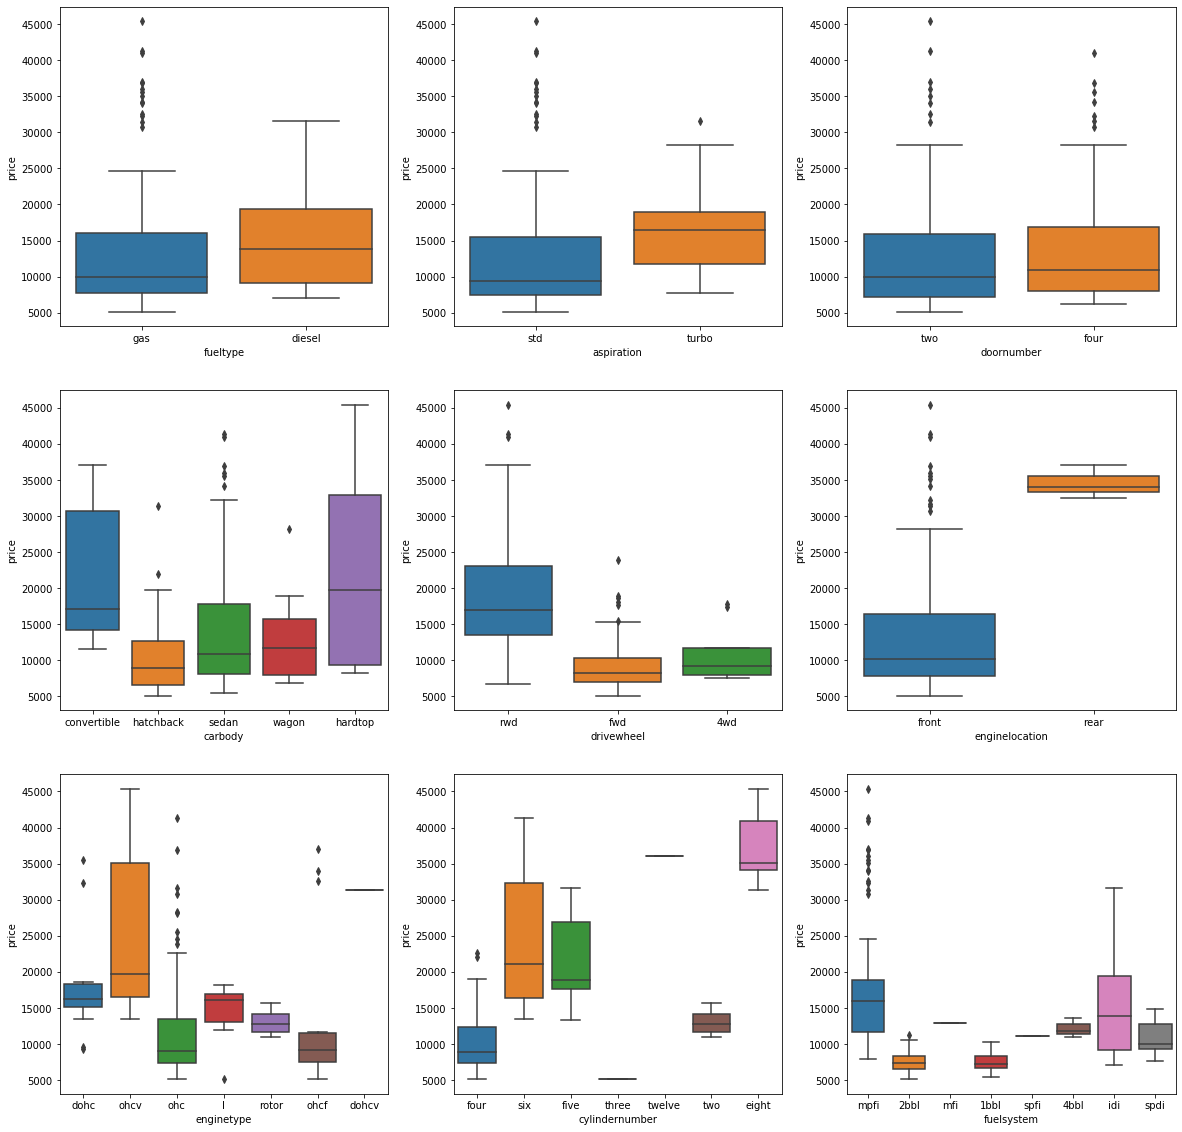

In [741]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df_cars)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df_cars)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df_cars)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_cars)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_cars)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_cars)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df_cars)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_cars)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_cars)

#### <u>Analysis Summary</u>:
1. Cars with diesel fuel type are having more price than cars with gas fuel type.
2. Cars with Turbo aspiration are costlier than standard (std) cards. However, standard cars have more outliers which are up to the max cost of 45000.
3. Number of doors for car is not afecting the car price much.
4. Car body type of hardtop and convertible as high priced, whereas, hatchback is most economical cars.
5. There is very noticable impact of Rear Wheel Drive (RWD) over Front Wheel Drive (FWD) and 4 Wheel Drive (4WD). No doubt, Rear Wheel Drive (RWD) cars are in the higher price range.
6. As expected there are very less rear engine location cars which is having very less data to draw any inferences. Most of the modern cars having engine location at front.
7. Most of the car models use OHCV engine and hence following into higher price range.
8. Majority of cars having four cylinders following by six and five. However, eight cylinders cars has the highest price range and thos will be premium luxary or sports cars.
9. Looking at last box plot, it is clearly visible that mpfi and idi are most common type of fuel systems followed by 2bbl. mpfi and idi having the highest price range.

<b>Car Company Analysis</b>

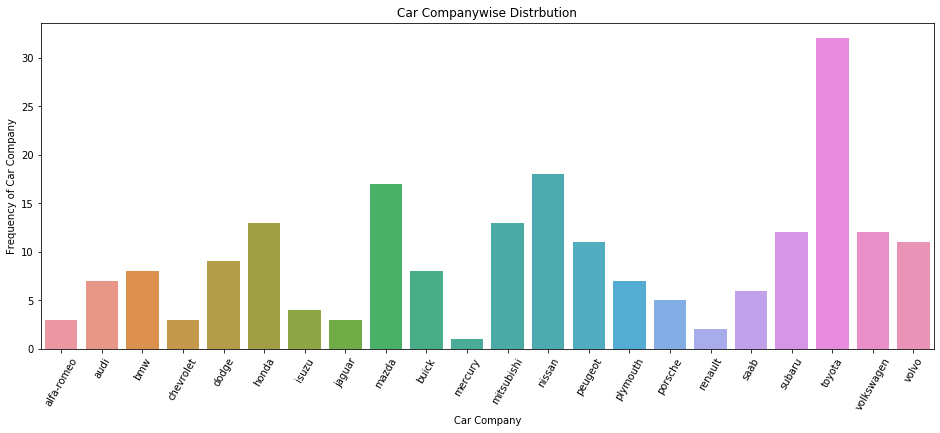

In [742]:
plt.figure(figsize=(16, 6))
plt.title("Car Companywise Distrbution")
sns.countplot(x="companyname", data=df_cars)
plt.xlabel("Car Company")
plt.ylabel("Frequency of Car Company")
plt.tick_params(axis ='x', rotation = 60)

#### <u>Analysis Summary</u>:
1. Toyota seems to be most favourite car company in US which is followed by Nissan and Mazda.
2. Mercury seems to least popular in US market followed by Renault.

<b>Analysis of Car Type and Fuel Type</b>

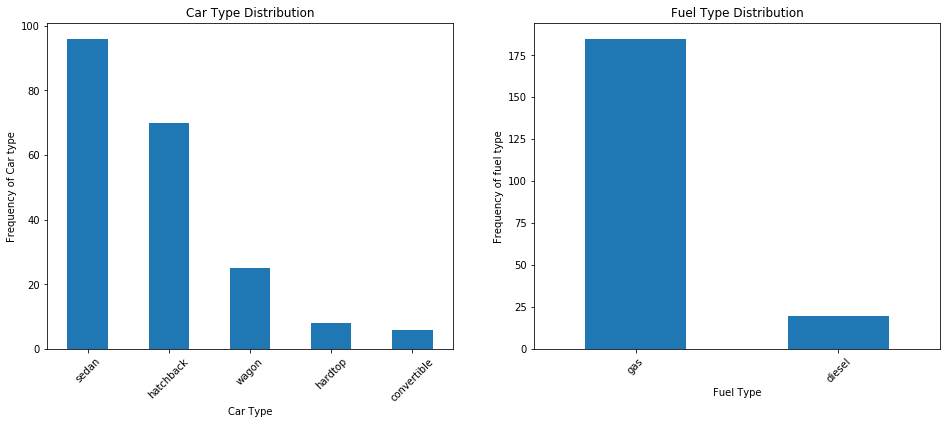

In [743]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt1 = df_cars.carbody.value_counts().plot('bar')
plt.title('Car Type Distribution')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')
plt.tick_params(axis ='x', rotation = 45)
plt.subplot(1,2,2)
plt1 = df_cars.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Distribution')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')
plt.tick_params(axis ='x', rotation = 45)

#### <u>Analysis Summary</u>:

1. Sedan is getting sold most in US market and it is the market leader followed by Hatchback.
2. Convertible car type is not so popular.
3. Cars with Gas are definately leading the market as compare to Diesel cars.

<b>Symboling Data Analysis</b>

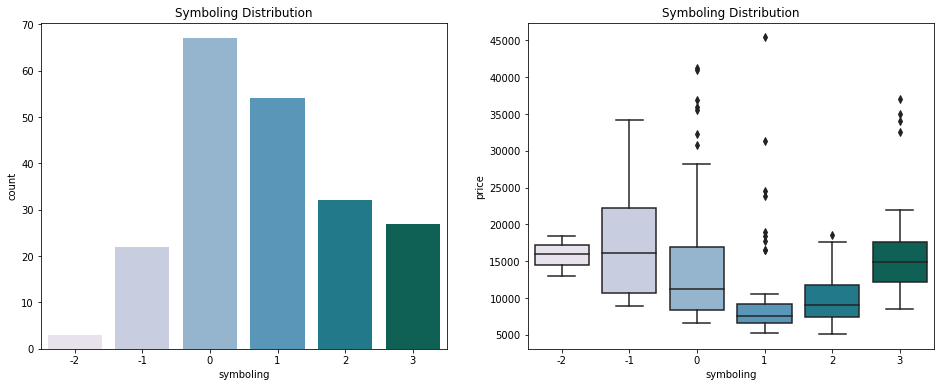

In [744]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Symboling Distribution')
sns.countplot(df_cars.symboling, palette=("PuBuGn"))
plt.subplot(1,2,2)
plt.title('Symboling Distribution')
sns.boxplot(x = 'symboling', y = 'price', data = df_cars, palette=("PuBuGn"))

#### <u>Analysis Summary</u>:

1. Most of the cars sold in the US market are symboling with 0 and 1 values indicating average insurance risk rating.
2. The risk rating -1 which indicates less risk is really influencing the high price of the cars.  
3. There is clearly visible dip in the car prices based on box plot for Symboling (risk rating) of 1, though there are few outliers in this segment which are even reaching the max price of 45000.

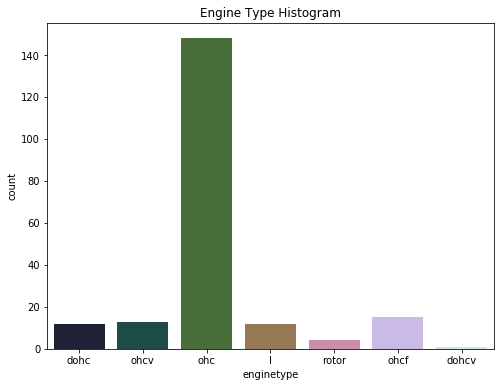

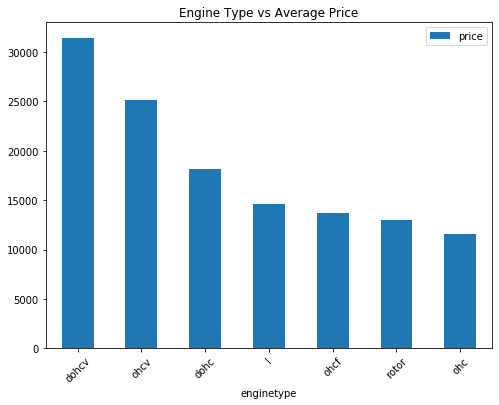

In [745]:
plt.figure(figsize=(8, 6))
plt.title('Engine Type Histogram')
sns.countplot(df_cars.enginetype, palette=("cubehelix"))
df_enginetype = pd.DataFrame(df_cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df_enginetype.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.tick_params(axis ='x', rotation = 45)

#### <u>Analysis Summary</u>:

1. An overhead camshaft (OHC) engine is used in majority of cars in US.
2. When compare average price range for various types of engines, the OHC engine is clear winner with low price range. 
2. The engine type OHCV and DOHCV has the highest price range.

<b>Analysis of Company Name vs Average Price</b>

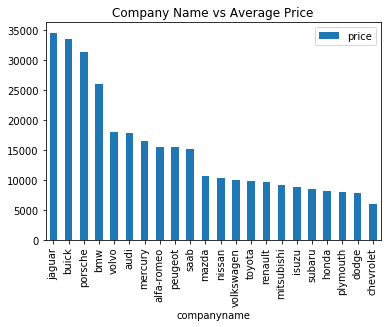

In [746]:
df = pd.DataFrame(df_cars.groupby(['companyname'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

#### <u>Analysis Summary</u>:

1. Jaguar and Buick has the highest average car prices.
2. Chevrolet has the lowest average car prices.

<b>Analysis of Fuel Type vs Average Price</b>

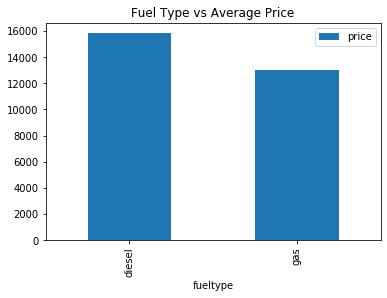

In [747]:
df = pd.DataFrame(df_cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

#### <u>Analysis Summary</u>:

It seems from above graph that Diesel Cars costs more that the Gas cars in US markets.


<b>Analysis of Car Type vs Average Price</b>

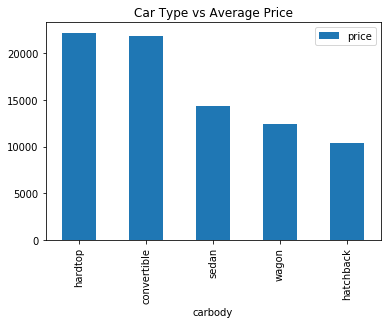

In [748]:
df = pd.DataFrame(df_cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### <u>Analysis Summary</u>:

Car type hardtop and covertibles have higher average price as compare to sedan, wagon and hatchback.

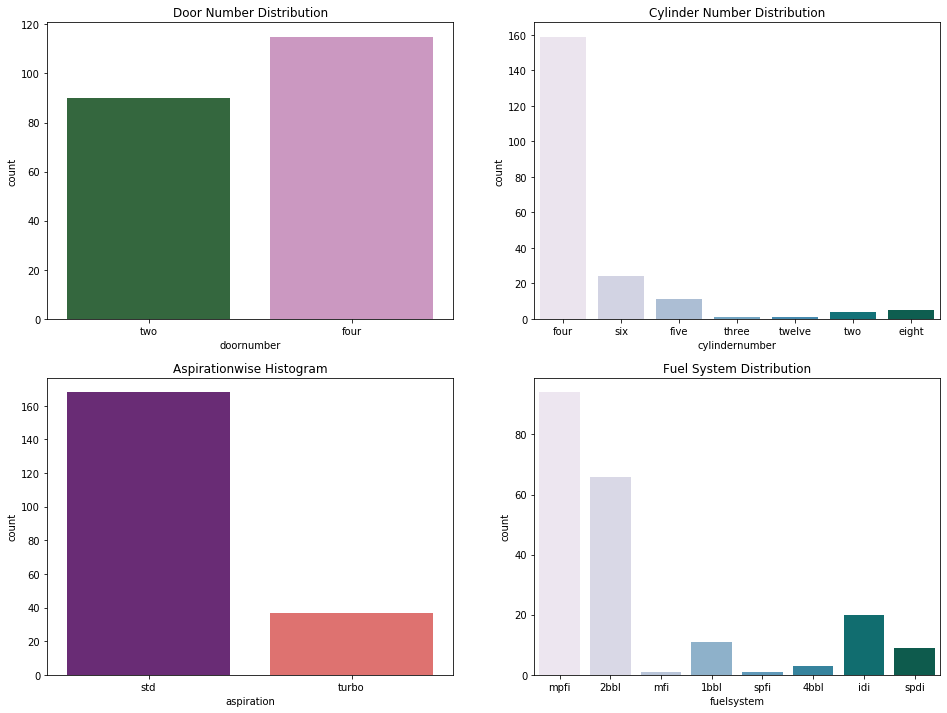

In [749]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
plt.title('Door Number Distribution')
sns.countplot(df_cars.doornumber, palette=("cubehelix"))

plt.subplot(2,2,2)
plt.title('Cylinder Number Distribution')
sns.countplot(df_cars.cylindernumber, palette=("PuBuGn"))

plt.subplot(2,2,3)
plt.title('Aspirationwise Histogram')
sns.countplot(df_cars.aspiration, palette=("magma"))

plt.subplot(2,2,4)
plt.title('Fuel System Distribution')
sns.countplot(df_cars.fuelsystem, palette=("PuBuGn"))

#### <u>Analysis Summary</u>:

1. There is not much of difference between the 2 & 4 door categories. Also, number of doors variable is not affacting the price of a car much. 
2. Four cylinder cars are most common in US market followed by six and five cylinder cars.
3. Majority of cars falls into the standard aspiration category.
4. mpfi fuel system is widely used followed by 2bbl and idi.

#### Step 3.3 : Continuous (numerical) data

Analysis of Car Dimentions (lenght, width and height) and Weight factors

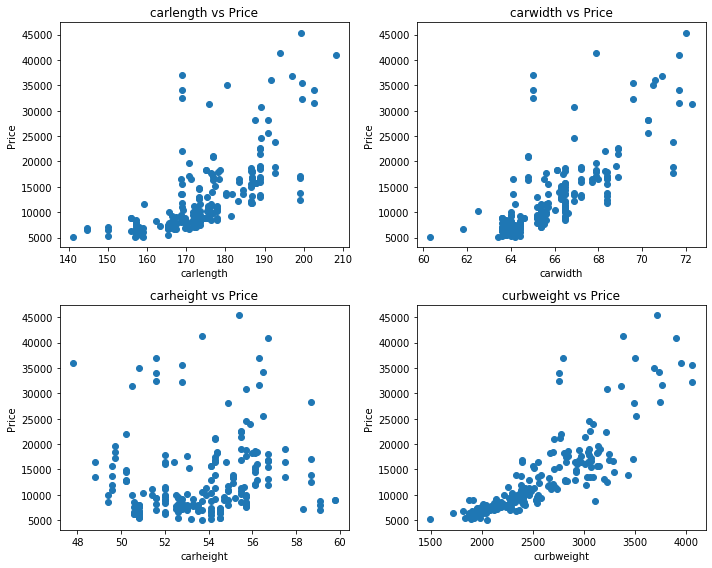

In [750]:
def scatter_plot(x_var,fig_idx):
    plt.subplot(2,2,fig_idx)
    plt.scatter(df_cars[x_var],df_cars['price'])
    plt.title('{} vs Price'.format(x_var))
    plt.ylabel('Price')
    plt.xlabel(x_var)

plt.figure(figsize=(10,8))

scatter_plot('carlength', 1)
scatter_plot('carwidth', 2)
scatter_plot('carheight', 3)
scatter_plot('curbweight', 4)

plt.tight_layout()

In [751]:
print('Corelation between Car Length and Price : {}'.format(df_cars.price.corr(df_cars.carlength)))
print('Corelation between Car Width and Price : {}'.format(df_cars.price.corr(df_cars.carwidth)))
print('Corelation between Car Curbweight and Price : {}'.format(df_cars.price.corr(df_cars.curbweight)))
print('Corelation between Car Height and Price : {}'.format(df_cars.price.corr(df_cars.carheight)))

Corelation between Car Length and Price : 0.6829200156779628
Corelation between Car Width and Price : 0.7593252997415119
Corelation between Car Curbweight and Price : 0.8353048793372965
Corelation between Car Height and Price : 0.11933622657049436


#### <u>Analysis Summary</u>:
Based on above scatter plots and corelation values, I have derived following inferences.
1. <b>carwidth, carlength and curbweight</b> seems to have a poitive correlation with <b>price</b>. 
2. <b>carheight</b> doesn't show any significant trend with price.

<b>Analysis for all other numric variables</b>, which includes:
1. enginesize
2. horsepower
3. stroke
4. boreratio
5. compressionratio
6. peakrpm
7. wheelbase
8. citympg
9. highwaympg

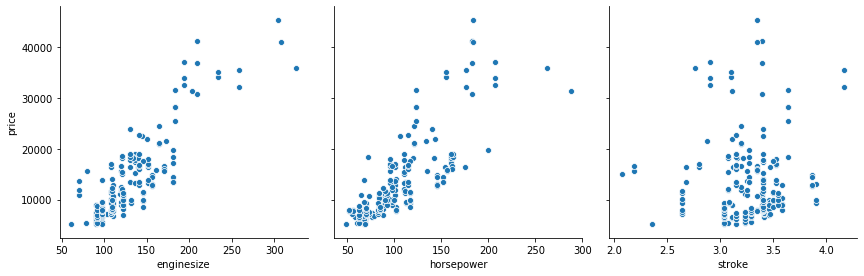

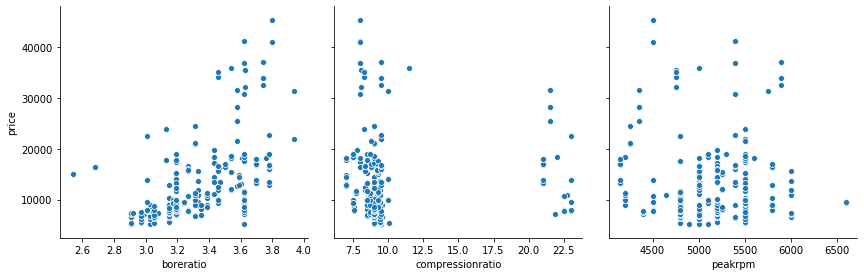

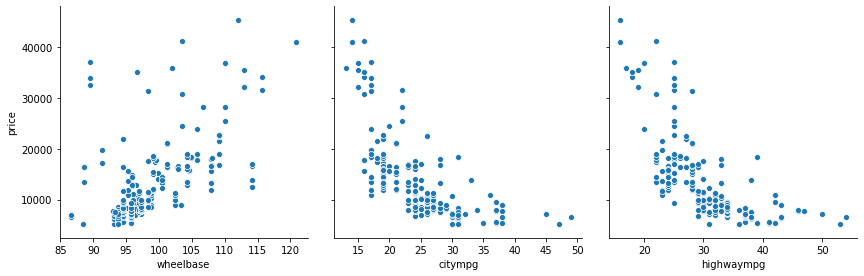

In [752]:
sns.pairplot(df_cars, x_vars=['enginesize', 'horsepower', 'stroke'], y_vars='price',size=4, aspect=1, kind='scatter')
sns.pairplot(df_cars, x_vars=['boreratio', 'compressionratio', 'peakrpm'], y_vars='price',size=4, aspect=1, kind='scatter')
sns.pairplot(df_cars, x_vars=['wheelbase', 'citympg', 'highwaympg'], y_vars='price',size=4, aspect=1, kind='scatter')

#### <u>Analysis Summary</u>:

Below variables show signficant positive corelation with car price.
1. enginesize
2. boreratio
3. horsepower
4. wheelbase

Below variables show signficant negative corelation with car price.
1. citympg
2. highwaympg

Below variables doesn't show any significant corelation with car price.
1. stroke
2. compressionratio
3. peakrpm

### Step 4 : Deriving new features

Data set provides the mileage separately for City and Highway. However, we are interested in overall fuel efficiency of the car. So lets create new derived feature for <b><i>Average Fuel Economy</i></b>. 

<b><u>Important Assumptions</u></b>: I have assumed the ratio of city and highway driving is 60:40.

In [753]:
# Calculate Average Fuel economy based on the assumed ratio of 60:40 for City and Highway mileage
df_cars['fueleconomy'] = (0.60 * df_cars['citympg']) + (0.40 * df_cars['highwaympg'])
df_cars.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,13495.00000,23.40000
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,16500.00000,23.40000
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.50000,171.20000,65.50000,52.40000,2823,ohcv,six,152,mpfi,2.68000,3.47000,9.00000,154,5000,19,26,16500.00000,21.80000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.80000,176.60000,66.20000,54.30000,2337,ohc,four,109,mpfi,3.19000,3.40000,10.00000,102,5500,24,30,13950.00000,26.40000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.40000,176.60000,66.40000,54.30000,2824,ohc,five,136,mpfi,3.19000,3.40000,8.00000,115,5500,18,22,17450.00000,19.60000


<b>Data Analysis for newly created Fuel Economy feature</b>

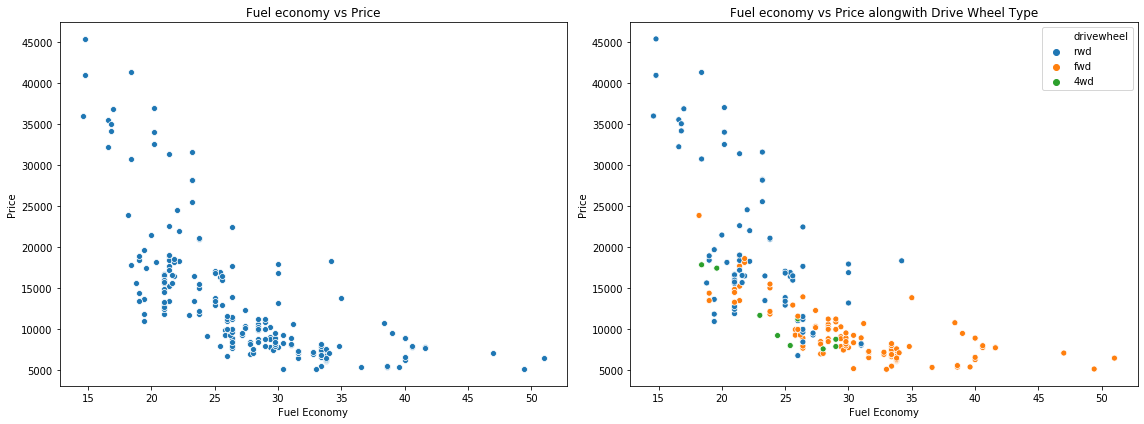

In [754]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Fuel economy vs Price')
sns.scatterplot(x = df_cars.fueleconomy, y = df_cars.price)
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.title('Fuel economy vs Price alongwith Drive Wheel Type')
sns.scatterplot(x = df_cars.fueleconomy, y = df_cars.price, hue = df_cars.drivewheel)
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.tight_layout()

#### <u>Analysis Summary</u>:

- When I have analysed how the fuel economy feature is impacting car price, it is showing <b>significant neagtive corelation</b>. This indicates the high priced Luxury cars has less fuel economy and budget and standard cars (i.e. Hatchback and Sedan) are having very good average fuel economy.  
- To further anlyse how rear wheel (RWD), front wheel (FWD) and 4 wheel (4WD) drive cars impact the fuel economy and price, I have perfromed the bivariate analysis in the right hand side scatter plot. The plot clearly indicates <b>4WD cars has best fuel economy and those are economical car models</b>.

<b>Car Classification on the basis of Car Price</b>

In automobile industry cars are classified into multiple categories based on features such as Car dimensions, body type (hatchback, sedan, MPV), engine capacity & power and so on. There are multiple car segments worldwide accepted and used which are A, B, C, D, E, E, F, S, M & J. (Refer for more details: https://en.wikipedia.org/wiki/Car_classification).

However, for simplicty pupose, I have decidied to classify the cars data set into below 3 categories on the basis of car price.
1. Budget (Micro, Mini and Small size economical cars)
2. Standard (Sedan, Compact MPV/ SUV, Executive cars)
3. Highend (Luxury and Sports cars) 

In [755]:
# Covert price column from float to integer for binning simplicity 
df_cars['price'] = df_cars['price'].astype('int')
df_temp = df_cars.copy()
df_grouped = df_temp.groupby(['companyname'])['price'].mean()
df_temp = df_temp.merge(df_grouped.reset_index(), how = 'left',on = 'companyname')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Standard','Highend']
df_cars['carscategory'] = pd.cut(df_temp['price_y'], bins, right = False, labels = cars_bin)
df_cars.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carscategory
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,13495,23.40000,Standard
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,16500,23.40000,Standard
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.50000,171.20000,65.50000,52.40000,2823,ohcv,six,152,mpfi,2.68000,3.47000,9.00000,154,5000,19,26,16500,21.80000,Standard
3,4,2,audi,gas,std,four,sedan,fwd,front,99.80000,176.60000,66.20000,54.30000,2337,ohc,four,109,mpfi,3.19000,3.40000,10.00000,102,5500,24,30,13950,26.40000,Standard
4,5,2,audi,gas,std,four,sedan,4wd,front,99.40000,176.60000,66.40000,54.30000,2824,ohc,five,136,mpfi,3.19000,3.40000,8.00000,115,5500,18,22,17450,19.60000,Standard


<b>Analysis for Fuel system, Drive Wheel and Car Category impact on Price </b>

Text(0.5, 1.0, 'Car Range vs Average Price')

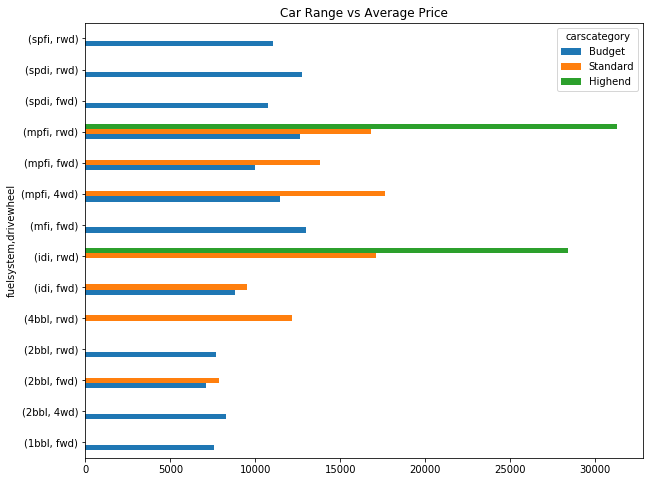

In [756]:
df = pd.DataFrame(df_cars.groupby(['fuelsystem','drivewheel','carscategory'])['price'].mean().unstack(fill_value=0))
df.plot.barh(figsize=(10,8))
plt.title('Car Range vs Average Price')

#### <u>Analysis Summary</u>:

- Cars in Highend category prefers Rear Wheel Drive (RWD) with idi or mpfi fuel system.
- Budget cars opt for multiple types of fuel system.

### List of significant variables after Visual analysis :

1. Car Category (Derived) 
2. Fuel Economy (Derived)
3. Curbweight (Continuous)
4. Car Length (Continuous)
5. Car width (Continuous)
6. Car Body (Categorial)
7. Drivewheel (Categorial) 
8. Engine Type (Categorial)
9. Fuel type (Categorial)
10. Aspiration (Categorial)
11. Cylinder Number (Categorial)
12. Engine Size (Continuous)
13. Boreratio (Continuous)
14. Horse Power (Continuous)
15. Wheel base (Continuous)

Create a data frame with Significant columns

In [757]:
df_cars_lr = df_cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carscategory']]
df_cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carscategory
0,13495,gas,std,convertible,rwd,88.60000,2548,dohc,four,130,3.47000,111,23.40000,168.80000,64.10000,Standard
1,16500,gas,std,convertible,rwd,88.60000,2548,dohc,four,130,3.47000,111,23.40000,168.80000,64.10000,Standard
2,16500,gas,std,hatchback,rwd,94.50000,2823,ohcv,six,152,2.68000,154,21.80000,171.20000,65.50000,Standard
3,13950,gas,std,sedan,fwd,99.80000,2337,ohc,four,109,3.19000,102,26.40000,176.60000,66.20000,Standard
4,17450,gas,std,sedan,4wd,99.40000,2824,ohc,five,136,3.19000,115,19.60000,176.60000,66.40000,Standard


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

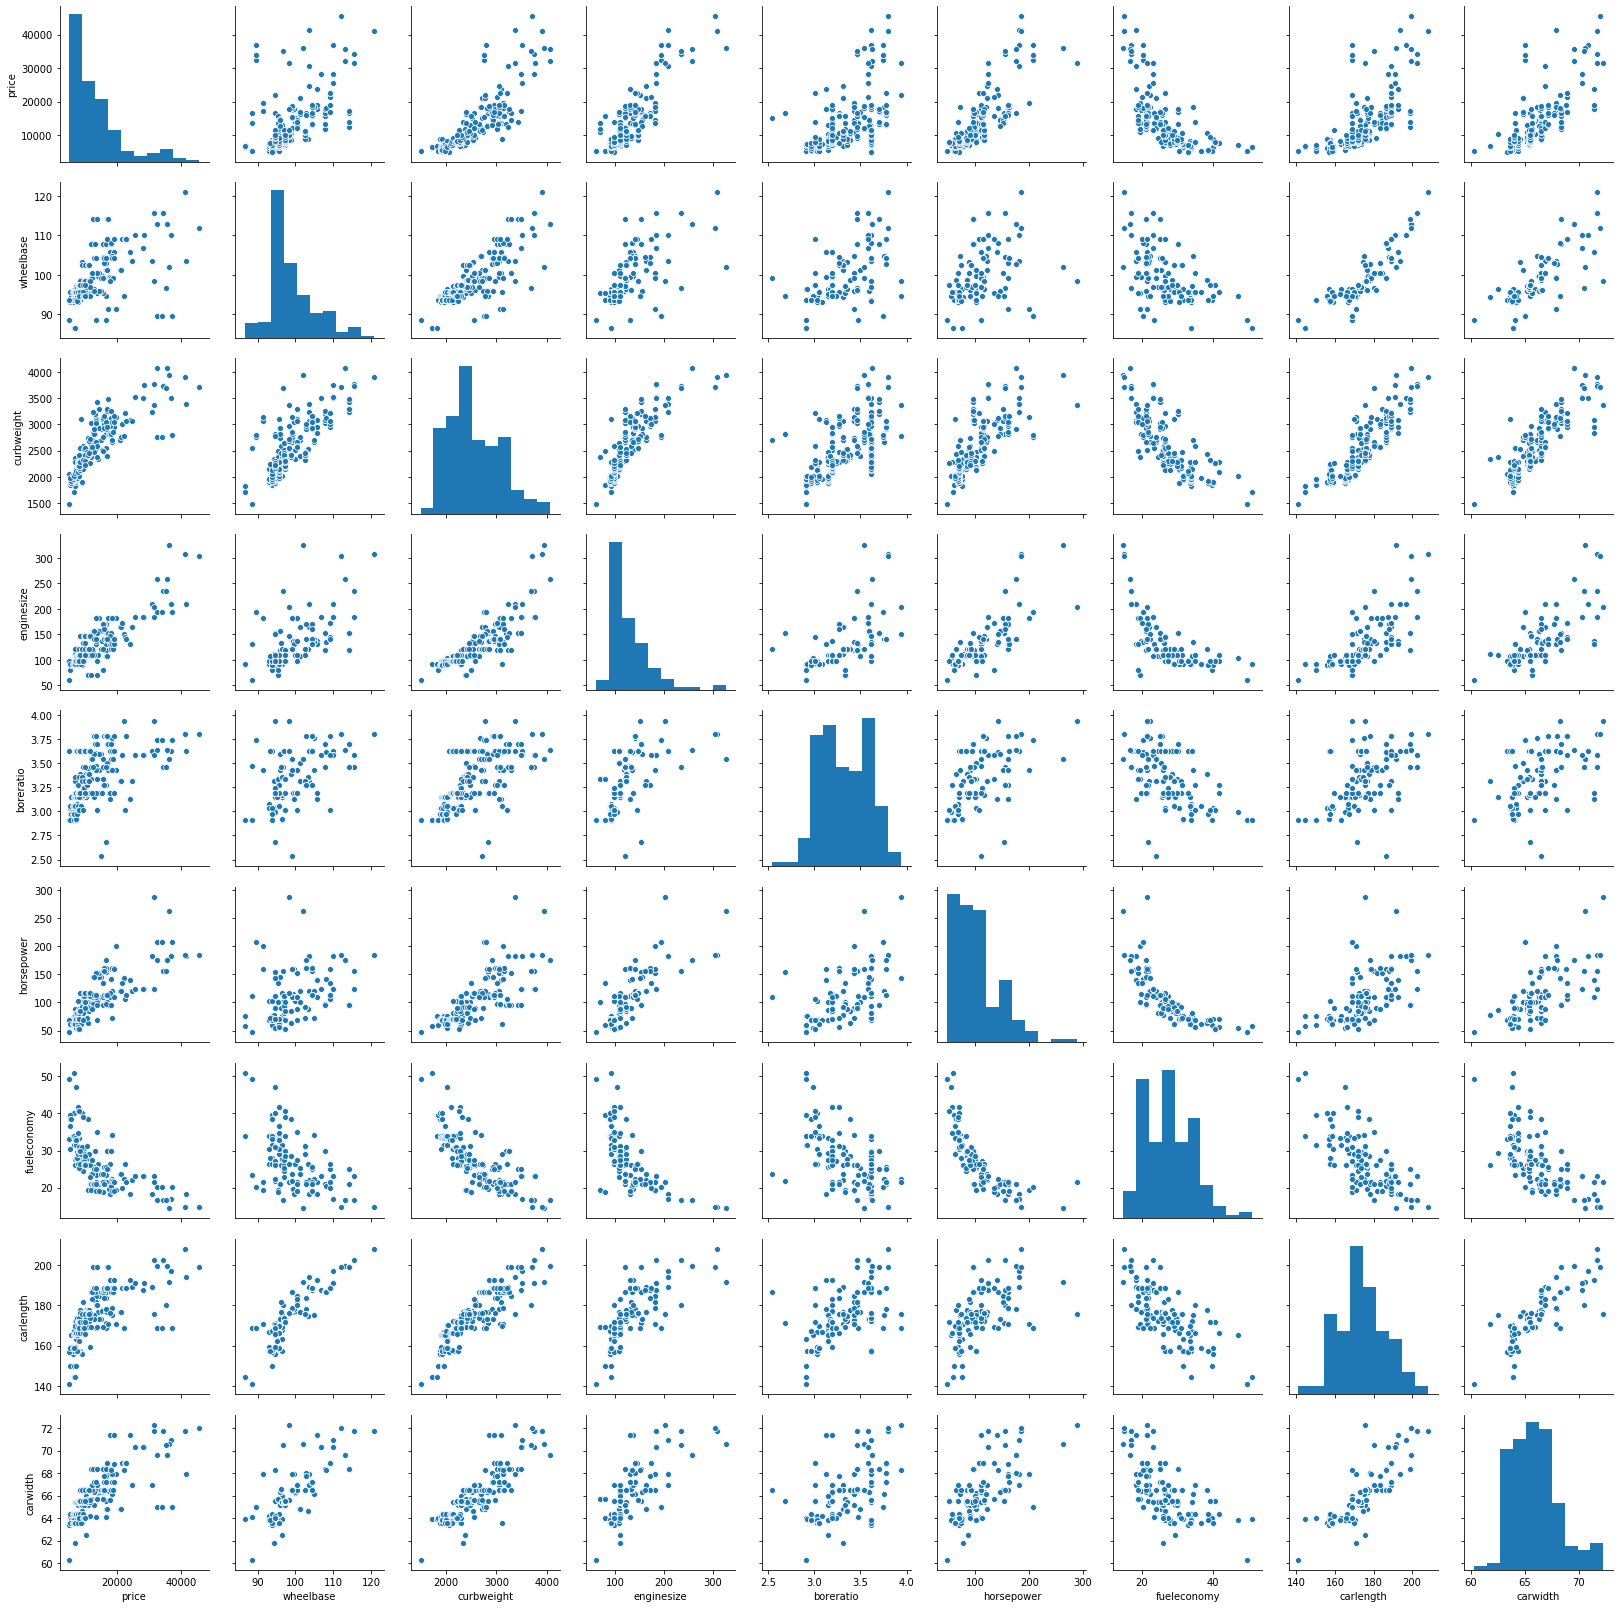

In [758]:
sns.pairplot(df_cars_lr)
plt.show()

#### <u>Analysis Summary</u>:

- On the analysis of above pair plot, it is clear that there are multiple independent (predictor) variables has significant corelation among those such as car dimensions (length, width & height), curbweight, engine size and so on. 
- While building the ML model, there seems to be multicollinearity issues which needs to be address.

## Section 2: Data Preparation for ML Model

### Step 1 : Create Dummy Variables

In [759]:
# Function for creating dummy variables 
def create_dummy_variable(cat_var,df):
    df_temp = pd.get_dummies(df[cat_var], drop_first = True)
    df = pd.concat([df, df_temp], axis = 1)
    df.drop([cat_var], axis = 1, inplace = True)
    return df

# Create dummy variables for categorial variables
df_cars_lr = create_dummy_variable('fueltype',df_cars_lr)
df_cars_lr = create_dummy_variable('aspiration',df_cars_lr)
df_cars_lr = create_dummy_variable('carbody',df_cars_lr)
df_cars_lr = create_dummy_variable('drivewheel',df_cars_lr)
df_cars_lr = create_dummy_variable('enginetype',df_cars_lr)
df_cars_lr = create_dummy_variable('cylindernumber',df_cars_lr)
df_cars_lr = create_dummy_variable('carscategory',df_cars_lr)

df_cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Standard,Highend
0,13495,88.60000,2548,130,3.47000,111,23.40000,168.80000,64.10000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.60000,2548,130,3.47000,111,23.40000,168.80000,64.10000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.50000,2823,152,2.68000,154,21.80000,171.20000,65.50000,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.80000,2337,109,3.19000,102,26.40000,176.60000,66.20000,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.40000,2824,136,3.19000,115,19.60000,176.60000,66.40000,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


### Step 2 : Split the Data into Training and Testing Sets

In [760]:
np.random.seed(0)
df_train, df_test = train_test_split(df_cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

### Step 3 : Rescaling the Features

In [761]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [762]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Standard,Highend
122,0.06882,0.24483,0.27269,0.13962,0.23016,0.08333,0.52747,0.42602,0.29167,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.46689,0.27241,0.50039,0.33962,1.00000,0.39583,0.20879,0.45203,0.66667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.12211,0.27241,0.31497,0.13962,0.44444,0.26667,0.34615,0.44878,0.30833,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.31445,0.06897,0.41117,0.26038,0.62698,0.26250,0.24176,0.45041,0.31667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.38213,0.61034,0.64740,0.26038,0.74603,0.47500,0.12088,0.77561,0.57500,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [763]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
price,143.00000,0.21931,0.21568,0.00000,0.06730,0.14034,0.31348,1.00000
wheelbase,143.00000,0.41114,0.20558,0.00000,0.27241,0.34138,0.50345,1.00000
curbweight,143.00000,0.40788,0.21127,0.00000,0.24554,0.35570,0.55954,1.00000
enginesize,143.00000,0.24135,0.15462,0.00000,0.13585,0.18491,0.30189,1.00000
boreratio,143.00000,0.49795,0.20714,0.00000,0.30556,0.50000,0.68254,1.00000
horsepower,143.00000,0.22730,0.16551,0.00000,0.09167,0.19167,0.28333,1.00000
fueleconomy,143.00000,0.35672,0.18590,0.00000,0.19505,0.34615,0.51099,1.00000
carlength,143.00000,0.52548,0.20485,0.00000,0.39919,0.50244,0.66992,1.00000
carwidth,143.00000,0.46166,0.18452,0.00000,0.30417,0.42500,0.55000,1.00000
gas,143.00000,0.90909,0.28849,0.00000,1.00000,1.00000,1.00000,1.00000


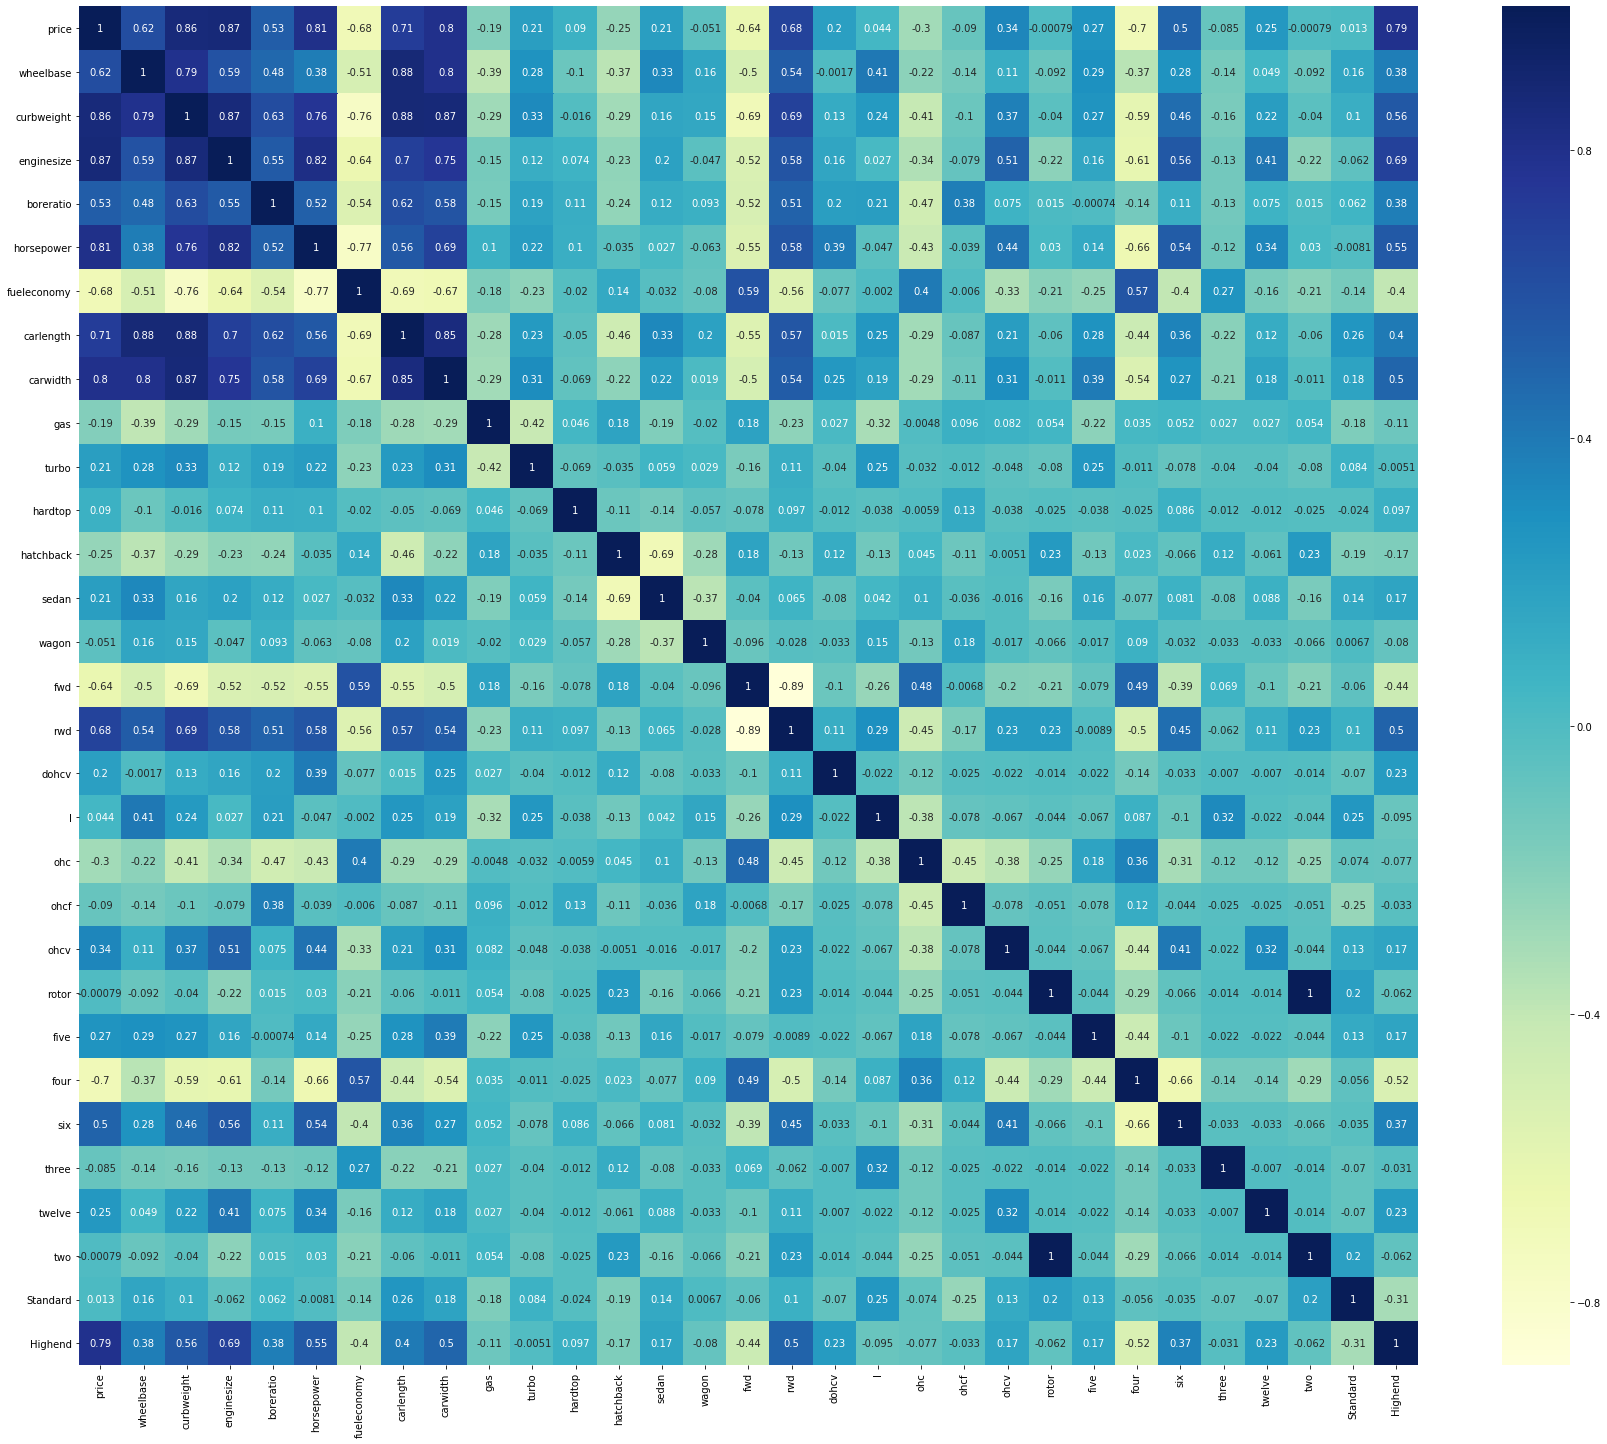

In [764]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")

#### <u>Analysis Summary</u>:

Based on the analysis of above Heatmap, there is a clear cluster formed in the upper left side corner with following highly corelated features:
- enginesize (87%)
- curbweight (86%)
- horsepower (81%)
- carwidth (80%)
- highend (79%)

### Step 4 : Dividing into X and Y sets for the model building

In [765]:
X_train = df_train
y_train = df_train.pop('price')

## Section 3: Model Building

Lets build the Multiple Linear Regression (MLR) Model for Car data set

### Step 1 : Recursive feature elimination (RFE)

Running RFE with the output number of the variable equal to 10

In [766]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, 10)         # running RFE
rfe = rfe.fit(X_train, y_train)

In [767]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Standard', False, 12),
 ('Highend', True, 1)]

<b>List of selected columns by RFE</b>

In [768]:
col_list = X_train.columns[rfe.support_]
col_list

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

<b>List of dropped columns by RFE</b>

In [769]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'enginesize', 'boreratio', 'carlength', 'gas', 'turbo',
       'hardtop', 'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five',
       'four', 'six', 'three', 'two', 'Standard'],
      dtype='object')

### Step 2 :  Building model using statsmodel, for the detailed statistics

In [770]:
X_train_rfe = X_train[col_list]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.27269,0.08333,0.52747,0.29167,0,1,0,0,0,0
125,0.50039,0.39583,0.20879,0.66667,1,0,0,0,0,1
166,0.31497,0.26667,0.34615,0.30833,1,0,0,0,0,0
1,0.41117,0.26250,0.24176,0.31667,0,0,0,0,0,0
199,0.64740,0.47500,0.12088,0.57500,0,0,1,0,0,0


In [771]:
def build_mlr_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def check_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [772]:
X_train_new = build_mlr_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.2
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.27e-70
Time:                        21:54:09   Log-Likelihood:                 205.86
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0946      0.042     -2.248      

In [773]:
#Calculating the Variance Inflation Factor
check_vif(X_train_new)

,Features,VIF
0,const,71.00000
1,curbweight,8.38000
6,sedan,6.18000
2,horsepower,5.96000
5,hatchback,5.68000
4,carwidth,5.19000
3,fueleconomy,3.72000
7,wagon,3.62000
8,dohcv,1.73000
10,Highend,1.68000


#### <u>Analysis Summary</u>:
<b>curbweight</b> has a high VIF value of 8.38 which is more than 5. This indicates that curbweight has high multicollinearity. Hence, dropping the <b>curbweight</b> feature.

In [774]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### MODEL 2


In [775]:
X_train_new = build_mlr_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     171.6
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.08e-68
Time:                        21:54:10   Log-Likelihood:                 198.19
No. Observations:                 143   AIC:                            -376.4
Df Residuals:                     133   BIC:                            -346.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0796      0.044     -1.808      

In [776]:
check_vif(X_train_new)

,Features,VIF
0,const,70.40000
5,sedan,6.17000
4,hatchback,5.61000
1,horsepower,5.12000
2,fueleconomy,3.65000
6,wagon,3.50000
3,carwidth,2.48000
9,Highend,1.59000
7,dohcv,1.53000
8,twelve,1.26000


#### <u>Analysis Summary</u>:
Dropping <b>sedan</b> column which has high VIF value of 6.17.

In [777]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

#### MODEL 3

In [778]:
X_train_new = build_mlr_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     182.9
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           3.31e-68
Time:                        21:54:10   Log-Likelihood:                 194.13
No. Observations:                 143   AIC:                            -370.3
Df Residuals:                     134   BIC:                            -343.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1316      0.041     -3.218      

In [779]:
check_vif(X_train_new)

,Features,VIF
0,const,57.78000
1,horsepower,5.04000
2,fueleconomy,3.63000
3,carwidth,2.30000
8,Highend,1.58000
6,dohcv,1.53000
7,twelve,1.25000
4,hatchback,1.23000
5,wagon,1.15000


#### <u>Analysis Summary</u>:
Feature <b>horsepower</b> is just on the boundry condtion with VIF value of 5.04. Instead of dropping this column lets analyse the less significant features based on p-Value statistics and then re-visit this feature again to check if it still has high VIF value.

Based on above summary statistics, <b>wagon</b> featues has highest p-Value of 0.394, which is greater that significance value of 0.05, hence dropping this insignificant variable.

In [780]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["wagon"], axis = 1)

#### MODEL 4

In [781]:
X_train_new = build_mlr_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           3.17e-69
Time:                        21:54:10   Log-Likelihood:                 193.74
No. Observations:                 143   AIC:                            -371.5
Df Residuals:                     135   BIC:                            -347.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1402      0.040     -3.543      

In [782]:
checkVIF(X_train_new)

,Features,VIF
0,const,54.25000
1,horsepower,4.95000
2,fueleconomy,3.51000
3,carwidth,2.30000
7,Highend,1.56000
5,dohcv,1.51000
6,twelve,1.25000
4,hatchback,1.14000


#### <u>Analysis Summary</u>:
As expected, VIF for <b>horsepower</b> has reduced to 4.95.

Also, none of the feature is having VIF of greater than 5.

Now, the p-Value of <b>fueleconomy</b> variable is 0.250 which is more than significance level of 0.05, hence dropping this insignificant variable.

In [783]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

#### MODEL 5

In [784]:
X_train_new = build_mlr_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           3.77e-70
Time:                        21:54:10   Log-Likelihood:                 193.04
No. Observations:                 143   AIC:                            -372.1
Df Residuals:                     136   BIC:                            -351.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0991      0.017     -5.705      0.0

In [785]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.43000
1,horsepower,2.63000
2,carwidth,2.11000
6,Highend,1.54000
4,dohcv,1.24000
5,twelve,1.18000
3,hatchback,1.13000


Dropping feature <b>twelve</b> which has high p-value.

In [786]:
X_train_new = X_train_new.drop(["twelve"], axis = 1)

#### MODEL 6

In [787]:
X_train_new = build_mlr_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.57e-70
Time:                        21:54:28   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [788]:
check_vif(X_train_new)

,Features,VIF
0,const,10.39000
1,horsepower,2.39000
2,carwidth,2.08000
5,Highend,1.53000
4,dohcv,1.21000
3,hatchback,1.13000


#### <u>Analysis Summary</u>:

Based on Summary statistics, all the feature has less p-Value than 0.05, which means <b>all the features are significant</b>.

VIF table shows that all features has VIF value f less than 2.5 indicating there is <b>no multicollinearity issue</b>.

Hence, I have considered this as a final trained model.

## Section 4: Residual Analysis

In [789]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

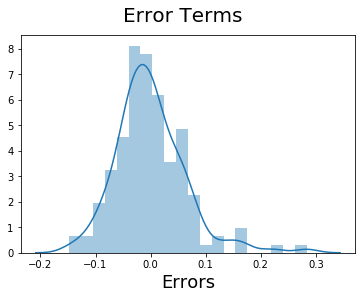

In [790]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

#### <u>Analysis Summary</u>:
Error terms seem to be approximately <b>normally distributed<b>, so the assumption on the linear modeling seems to be fulfilled.

## Section 5: Prediction and Model Evaluation

### Step 1 : Scaling the test set

In [791]:
num_vardf_tests = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

### Step 2 : Dividing into X and Y sets

In [792]:
y_test = df_test.pop('price')
X_test = df_test

In [793]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

### Step 3 : Making predictions

In [794]:
y_pred = lm.predict(X_test_new)

### Step 4 : Calculate the R-squared score on the test set

In [795]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8146387226353735

Text(0, 0.5, 'y_pred')

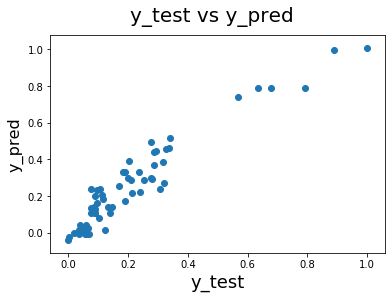

In [796]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### Evaluation of the model using Statistics

In [797]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.57e-70
Time:                        22:02:19   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

#### <u>Analysis Summary</u>:

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.912 and 0.909 - `90%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 284.8 and 1.57e-70(approx. 0.0) - Model fit is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.